In [1]:
import pandas as pd
import csv

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

## Read the data

In [2]:
data_task2 = pd.read_csv('results_task2.csv')
data_task3 = pd.read_csv('results_task3.csv')

## Preprocess data

In [3]:
data_task2[['Explorer Algorithm']] = data_task2[['Explorer Algorithm']].replace({0:'Original baseline explorer',
                                 1:'Wavefront Frontier Detector Algorithm'})
data_task2 = data_task2.sort_values('Explorer Algorithm')

data_task3[['Explorer Algorithm']] = data_task3[['Explorer Algorithm']].replace({0:'Original baseline explorer',
                                 1:'Wavefront Frontier Detector Algorithm'})
data_task3 = data_task3.sort_values('Explorer Algorithm')

In [4]:
data_task2

,Explorer Algorithm,Coverage,Time Taken to Explore,ROS Time Scale Factor,Start/End Validated by Search Grid
0,Original baseline explorer,0.782533,1422.048644,2,True
1,Wavefront Frontier Detector Algorithm,0.782133,1264.948794,2,True


In [5]:
data_task3

,Explorer Algorithm,Coverage,Time Taken to Explore,ROS Time Scale Factor,Start/End Validated by Search Grid
1,Original baseline explorer,0.780800,1892.598195,2,NaN
2,Original baseline explorer,0.780133,1583.506041,1,NaN
0,Wavefront Frontier Detector Algorithm,0.783067,1411.198654,2,NaN
3,Wavefront Frontier Detector Algorithm,0.781067,1506.605747,1,NaN


In [6]:
tsf2_task3 = data_task3.loc[data_task3['ROS Time Scale Factor'] == 2]
tsf2_task3

,Explorer Algorithm,Coverage,Time Taken to Explore,ROS Time Scale Factor,Start/End Validated by Search Grid
1,Original baseline explorer,0.780800,1892.598195,2,NaN
0,Wavefront Frontier Detector Algorithm,0.783067,1411.198654,2,NaN


## Part 2 Results

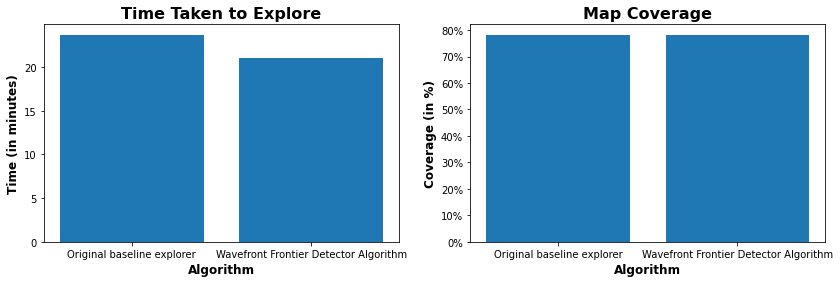

In [7]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].bar(data_task2['Explorer Algorithm'], data_task2['Time Taken to Explore']/60)
ax[0].set_title('Time Taken to Explore',fontsize=16,fontweight='bold')
ax[0].set_xlabel('Algorithm',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Time (in minutes)',fontsize=12,fontweight='bold')

ax[1].bar(data_task2['Explorer Algorithm'], data_task2['Coverage']*100)
ax[1].set_title('Map Coverage',fontsize=16,fontweight='bold')
ax[1].set_xlabel('Algorithm',fontsize=12,fontweight='bold')
ax[1].set_ylabel('Coverage (in %)',fontsize=12,fontweight='bold')
ax[1].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d%%'))

plt.suptitle('',fontsize=25,fontweight='bold',y=0.95)

plt.savefig('Part2.png')

In [8]:
s = data_task3.iloc[0]        
a = s.index[s == 1]
print (a)

a = s.index.values[(s == 2)]
print (a)

Index([], dtype='object')
['ROS Time Scale Factor']


## Part 3 Results

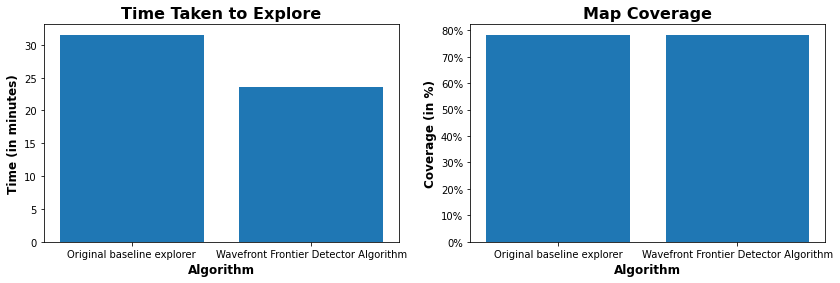

In [9]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].bar(tsf2_task3['Explorer Algorithm'], tsf2_task3['Time Taken to Explore']/60)
ax[0].set_title('Time Taken to Explore',fontsize=16,fontweight='bold')
ax[0].set_xlabel('Algorithm',fontsize=12,fontweight='bold')
ax[0].set_ylabel('Time (in minutes)',fontsize=12,fontweight='bold')

ax[1].bar(tsf2_task3['Explorer Algorithm'], tsf2_task3['Coverage']*100)
ax[1].set_title('Map Coverage',fontsize=16,fontweight='bold')
ax[1].set_xlabel('Algorithm',fontsize=12,fontweight='bold')
ax[1].set_ylabel('Coverage (in %)',fontsize=12,fontweight='bold')
ax[1].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d%%'))

plt.suptitle('',fontsize=25,fontweight='bold',y=0.95)

plt.savefig('Part3.png')

## Entropy plots

In [10]:
with open('entropy_task3_baseline_TSF2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        data_baseline=row
data_baseline=[float(i) for i in data_baseline[:-1]]

In [11]:
with open('entropy_task3_WFD_TSF2.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        data_wfd=row
data_wfd=[float(i) for i in data_wfd[:-1]]

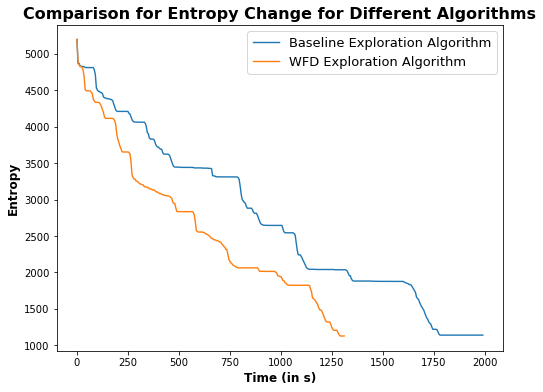

In [12]:
fig = plt.figure(figsize=(8,6))
x1=np.arange(0,len(data_baseline)*5,5)
plt.plot(x1,data_baseline,linewidth=1.4, label='Baseline Exploration Algorithm')
x2=np.arange(0,len(data_wfd)*5,5)
plt.plot(x2,data_wfd,linewidth=1.4, label='WFD Exploration Algorithm')
plt.xlabel('Time (in s)',fontsize=12,fontweight='bold')
plt.ylabel('Entropy',fontsize=12,fontweight='bold')
plt.legend(fontsize=13)
plt.title('Comparison for Entropy Change for Different Algorithms',fontsize=16,fontweight='bold')
plt.savefig('EntropyChange.png')